## Pandas Part 2

### Outline:
- DataFrame Index

- Cleaning Missing Data and Converting a Column's Data Type

- Sorting Series and Dataframe

- Computing Summary Statistics


We generally import Pandas under the alias `pd`

In [ ]:
import pandas as pd
import numpy as np

### Dataframe Index

Load CSV File as a Pandas Data Frame

In [ ]:
df = pd.read_csv('titanic3.csv')
df.head(5)
# NOTE: The index is the left most column in a df

Let's say we want to have `name` column as our index

In [ ]:
df.set_index('name')

In [ ]:
# But check it out, it didn't save our index change
df.head(2)

In [ ]:
# To save it, we need to use an additional parameter in the set_index function: inplace = True
df.set_index('name',inplace = True)
df.head(2)

In [ ]:
# But we can always return to the original index, but remember to use the inplace=True to save your work
df.reset_index(inplace = True)
df.head(2)

### Cleaning Missing Data and Converting a Column's Data Type

In [ ]:
df.info()
# NOTE: Values in age column are currently in string format

In [ ]:
# Let's check the value_counts of age column
df['age'].value_counts()

Missing data can come in many forms.

Looks like some data is missing in the `age` column

Observe that 263 rows have a '?' as the value. No wonder this column was a string instead of a number.

In [ ]:
# Let's convert '?' values to a Numpy "Not a Number" datatype, np.nan
# There is a function called .replace()
# We'll leave our original df in place
# This replaces everything in the dataset with a '?' into a np.nan data type
df3 = df.replace(to_replace = '?', value = np.nan)

In [ ]:
type(np.nan)

In [ ]:
# The '?' value are gone, NaNs rows don't show up here
df3['age'].value_counts()

In [ ]:
# If you want to see NaNs in value_counts, use the parameter dropna = False
df3['age'].value_counts(dropna = False)

In [ ]:
df3.info()

In [ ]:
# Let's convert the age column from a string to a float.
df3['age'] = df3['age'].astype(float)
df3.info()

In [ ]:
# one more way . . . to_numeric . . .
convert_coerce = df.copy()
convert_coerce

# use to_numeric to force age to a number, substitute any non-parsable to NaN
convert_coerce['age'] = pd.to_numeric(convert_coerce['age'], errors='coerce')
convert_coerce.info()

### Sorting Series

In [ ]:
mySeries = pd.Series([3, 9, -5, 2])
mySeries

In [ ]:
# sort_values() goes in ascending order by default:
mySeries.sort_values()

In [ ]:
# We can force descending order:
mySeries.sort_values(ascending=False)

### Sorting DataFrames

In [ ]:
myFrame = pd.DataFrame([[4, 1, 7], [3, 9, 4]], index=['a', 'b'], columns=['x', 'y', 'z'])
myFrame

In [ ]:
# Sort by column 'x', in ascending order (default):
myFrame.sort_values(by=['x'])

In [ ]:
# Sort by column 'x', in descending order:
myFrame.sort_values(by=['x'], ascending=False)

You can also sort index in a dataframe

In [ ]:
newFrame = pd.DataFrame([[4, 1, 7], [3, 9, 4]], index=['q', 'p'], columns=['c', 'b', 'a'])
newFrame

In [ ]:
newFrame.sort_index() # Will sort row indices

In [ ]:
newFrame.sort_index(axis = 1) # Will sort column indices

### Computing Summary Statistics

In [ ]:
# Consider a DataFrame
df1 = pd.DataFrame([[1.4, -0.2], [7.1, -4.5],
                   [5.6, -2.1], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df1

In [ ]:
# sum() returns a Series containing column sums
df1.sum()

In [ ]:
# Passing axis=1 provides row sums
df1.sum(axis=1)

In [ ]:
# Taking mean of a specific column
df1['one'].mean()

How to we find mean of a specific row?

In [ ]:
# Your code here

In [ ]:
# describe() produces multiple summary statistics in one shot
df1.describe()

**List of summary statistics and related methods (from Wes McKinney Book)**
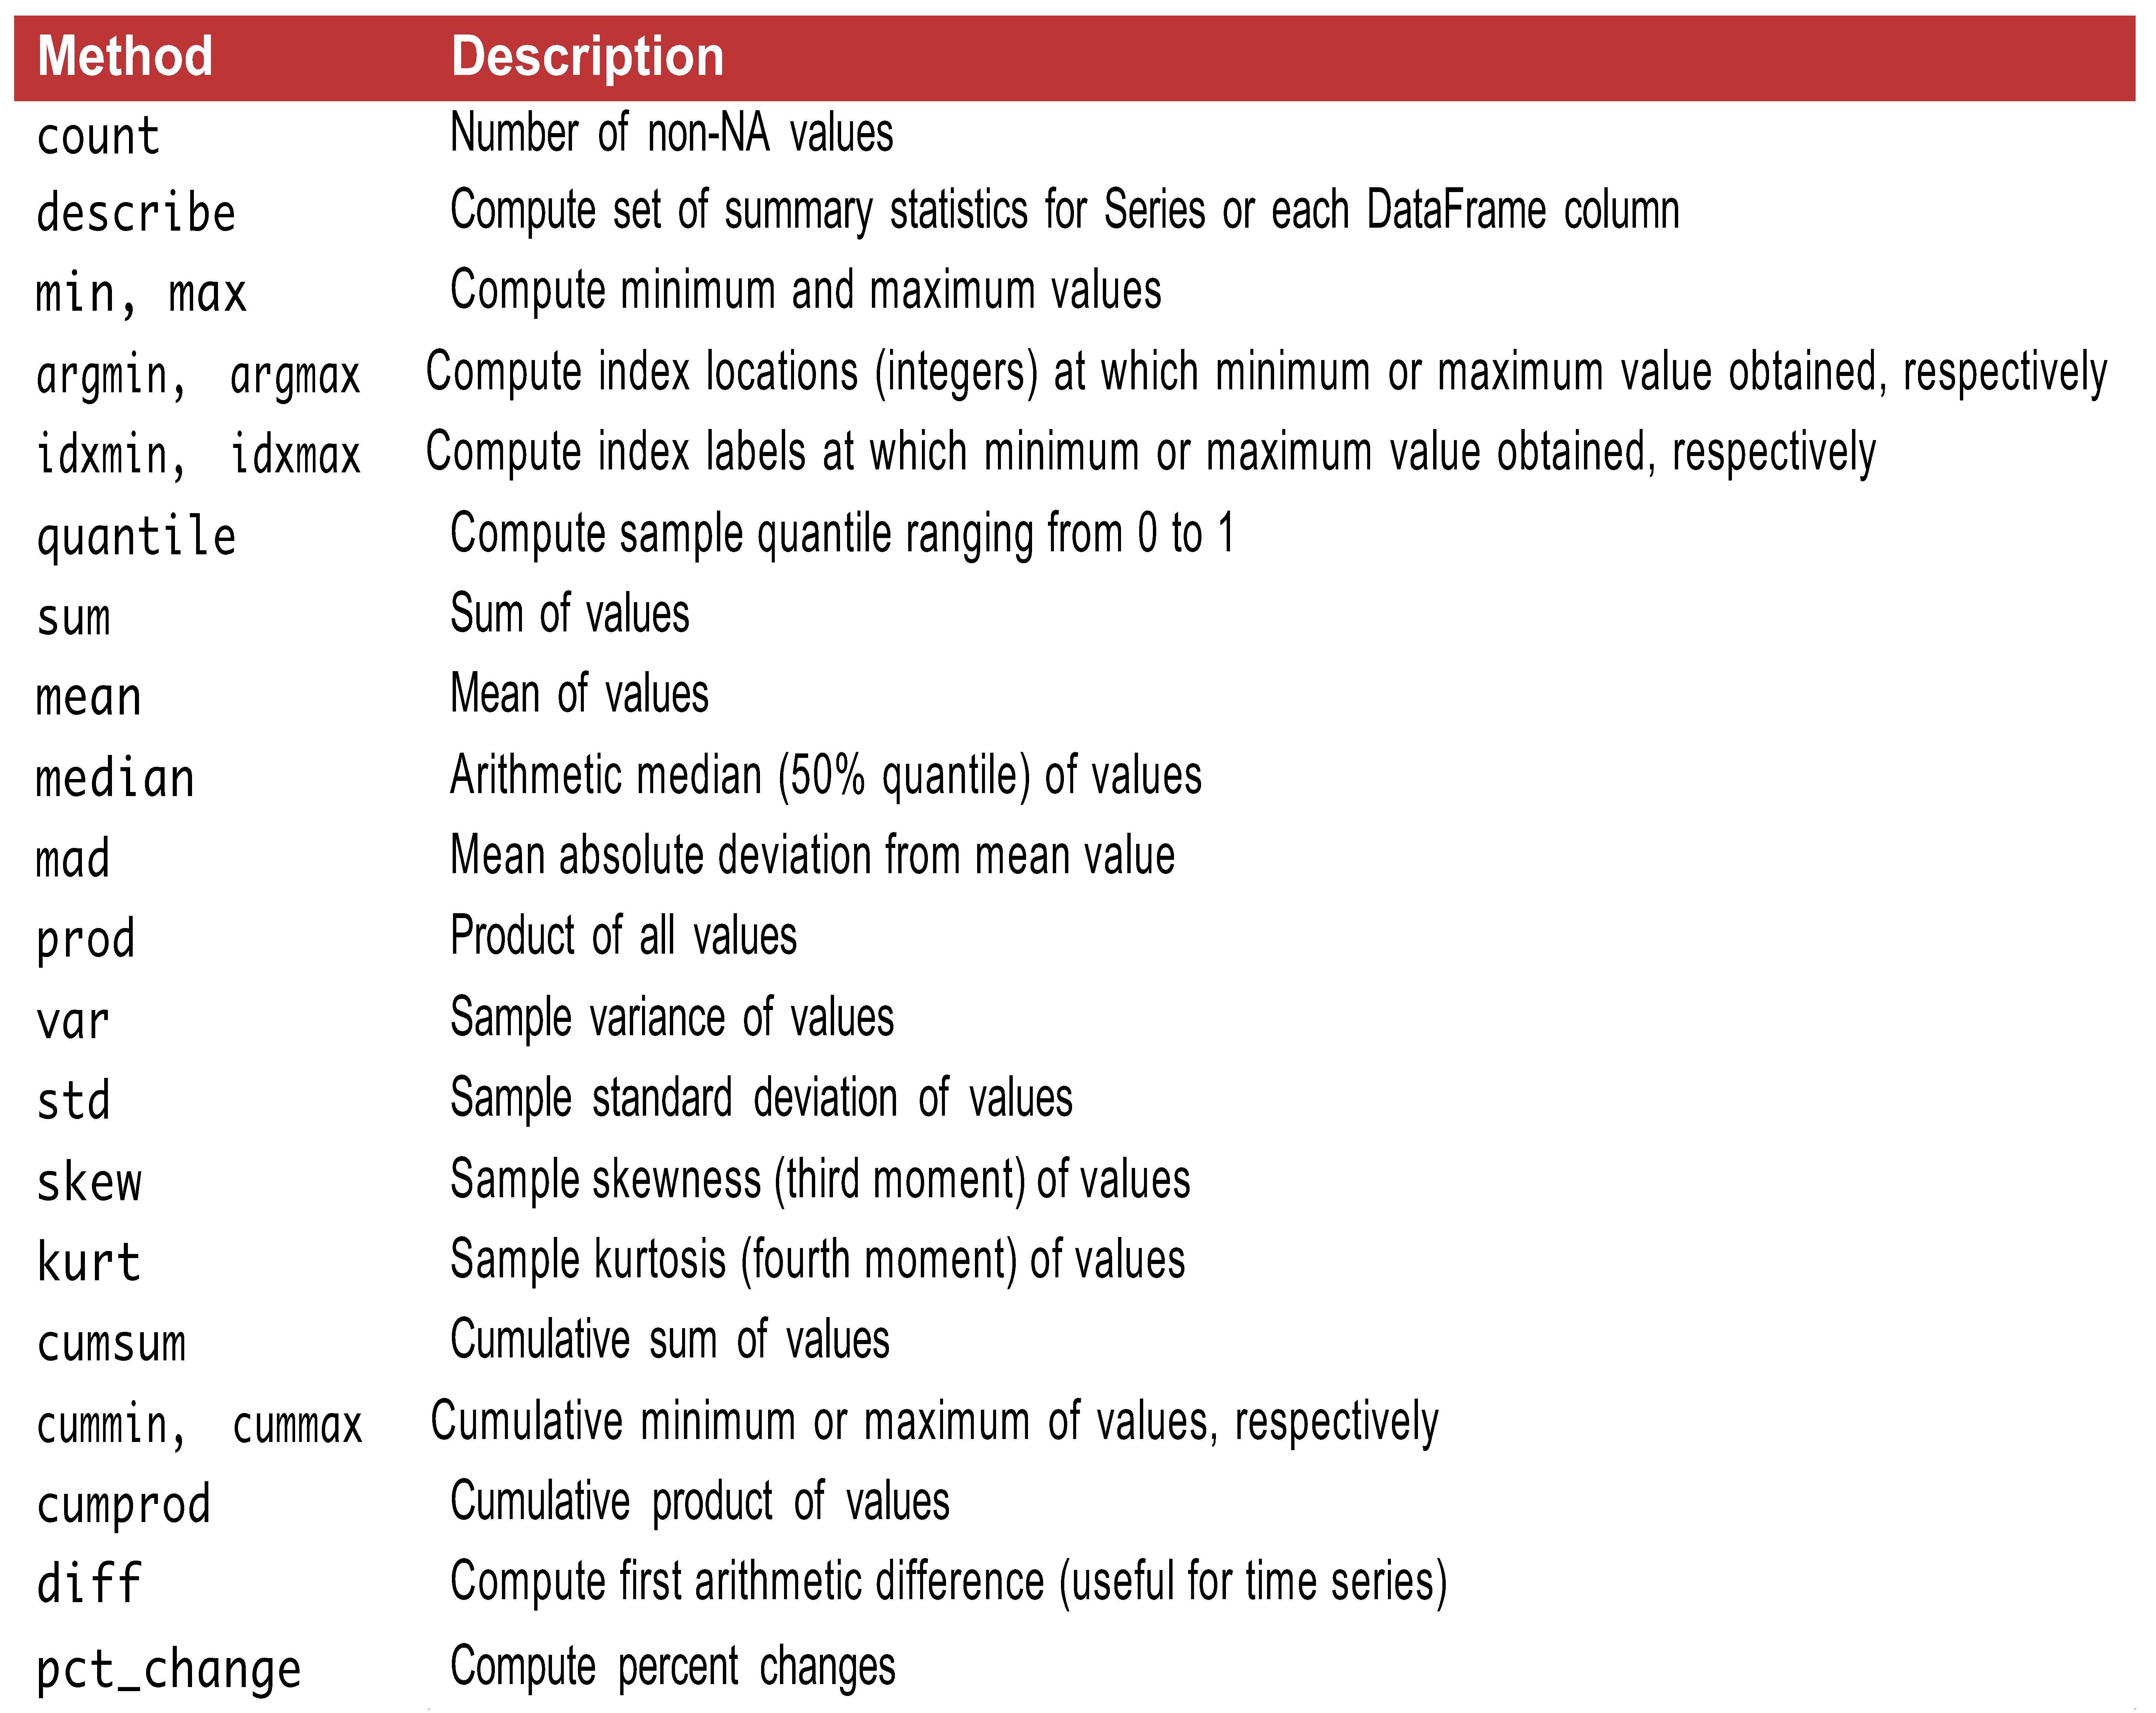

